<a href="https://colab.research.google.com/github/CHOOSLA/Self_Studying_of_Machine-Learning_and_Deep-Learning/blob/main/Chapter_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
##################
##군집 알고리즘###
##################


#타깃을 모르는 비지도 학습 ( 즉, 정답을 모른다! )

#과일 사진 데이터 준비하기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
#넘파일 배열인 npy로 저장이 되어있음
#여기서 !의 의미는 코랩에서 파이썬 코드가 아니라 리눅스 셸 명령으로 이해한다.

--2021-10-27 12:27:38--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-10-27 12:27:38--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-10-27 12:27:38--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [11]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
print(fruits.shape) 
#이미지 크기가 100x100인 사진 300장

(300, 100, 100)


In [12]:
print(fruits[0,0,:])
#첫 번째 이미지의 첫 번째 행을 출력

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


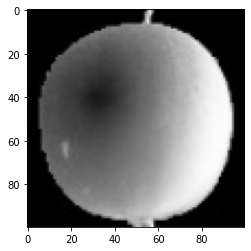

In [13]:
plt.imshow(fruits[0],cmap='gray')
plt.show()
#원래는 바탕이 밝고 사과가 짙은 색이지만
#사진으로 찍은 이미지를 넘파이 배열로 변환할 때 반전시 것
#검은색은 낮은값 흰색은 높은 값
#알고리즘이 어떤 출력을 만들기 위해 곱셈, 덧셈을 한다.
#픽셀값이 0이면 출력도 0이 되어 의미가 없으니깐
#픽셀 값이 높으면 출력값도 커지기 때문에 의미를 부여하기 좋다

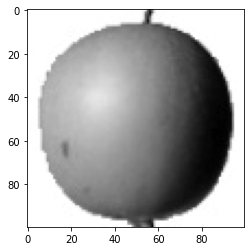

In [14]:
plt.imshow(fruits[0],cmap='gray_r')
plt.show()
#밝은 부분이 0에 가깝고 짙은 부분이 255에 가깝다

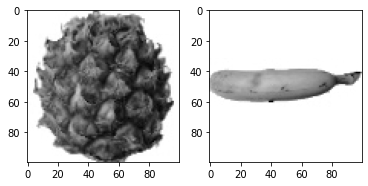

In [15]:
fig,axs = plt.subplots(1,2)
axs[0].imshow(fruits[100],cmap='gray_r')
axs[1].imshow(fruits[200],cmap='gray_r')
plt.show()
#subplots 함수를 사용하면 여러 개의 그래프를 배열 처럼 쌓을 수 있도록 도와준다.
#1,2인 것은 하나의 행과 2개의 열을 지정
#반환된 axs는 2개의 서브 그래프를 담고 있는 배열
#처음 100개는 사과, 그다음 100개는 파인애플, 마지막 100개는 바나나

(100, 10000)
[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


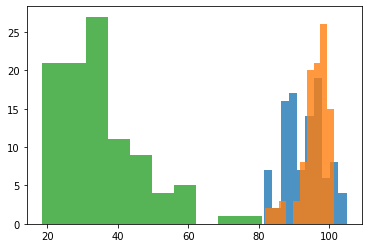

In [16]:
#픽셀값 분석하기

#사용하기 쉽게 fruits 데이터를 사과, 파인애플, 바나나로 각각 나누어 봅시다
#100x100 이미지를 펼쳐서 길이가 10000인 1차원 배열로 만든다.
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)
print(apple.shape)
#샘플마다 픽셀의 평균값을 계산해야 하므로
#axis = 0 으로하면 첫 번째 축인 행을 따라 계산
#axis = 1로 지정하면 두 번째 축인 열을 따라 계산

print(apple.mean(axis=1))
#100개에 대한 픽셀의 평균값을 계산

#히스토그램을 그려보면 평균값이 어떻게 분포되어 잇는지 잘 볼 수 있다.
#히스토그램이란? 값이 발생한 빈도를 그래프로 표시한 것
#보통 축기 값의 구간, y축은 발생빈도
plt.hist(np.mean(apple,axis=1),alpha=0.8)
plt.hist(np.mean(pineapple,axis=1),alpha=0.8)
plt.hist(np.mean(banana,axis=1),alpha=0.8)
plt.show()
#히스토그램을 보면 바나나 사진의 평균값은 40아래에 집중되어 있다
#사과와 파인애플은 90~100 사이에 많이 모여 있다.
#사과와 파인애플은 구분하기 어렵다!!!
#그래서 샘플의 평균값이 아니라 픽셃려 평균값을 비교


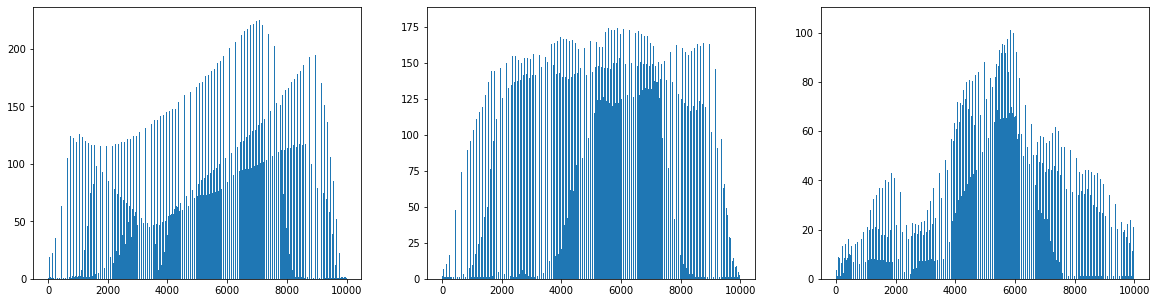

In [17]:
fig,axs=plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000),np.mean(pineapple,axis=0))
axs[2].bar(range(10000),np.mean(banana,axis=0))
plt.show()
#순서대로 사과, 파인애플, 바나나 그래프 이다.
#즉, 100개의 이미지의 10000개의 픽셀을 평균화 시킨 것이다.
#x축은 픽셀의 위치
#y축은 픽셀의 위치의 100개 이미지의 평균값

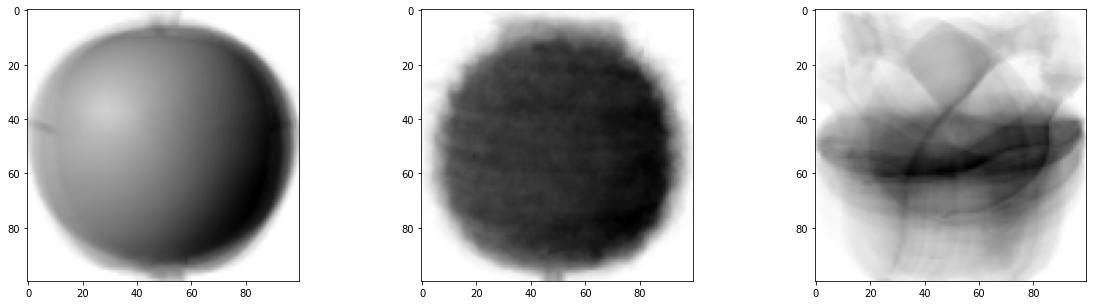

In [18]:
#픽셀 평균값을 100x100 크기로 바꿔서 이미지 처럼 출력하여 위 그래프와 비교

apple_mean = np.mean(apple,axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple,axis=0).reshape(100,100)
banana_mean = np.mean(banana,axis=0).reshape(100,100)
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean,cmap='gray_r')
axs[1].imshow(pineapple_mean,cmap='gray_r')
axs[2].imshow(banana_mean,cmap='gray_r')
plt.show()

In [19]:
#평균값과 가까운 사진 고르기

#3장에서 봤던 절댓값 오차를 사용
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff,axis=(1,2))
print(abs_mean.shape)
#axis에서 두번째, 세번째 차원을 모두 지정했다.
#이렇게 계산한 abs_mean은 각 샘플의 오차 평균이다.
#그래서 크기가 300인 1차원 배열이 나왔다.

(300,)


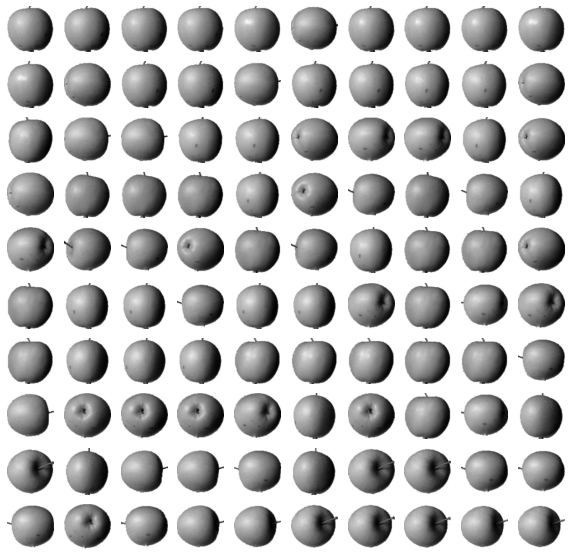

In [20]:
#np.argsort는 작은 것에서 큰 순서대로 나열한 abs_mean의 배열 인덱스
apple_index = np.argsort(abs_mean)[:100]
fig,axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*10 + j]],cmap='gray_r')
    axs[i,j].axis('off')
plt.show()
#절대값 오차를 사용해 제일 똑같은 것 기준으로 출력하겠습니다
#가장 가까운 사진 100개를 골랐더니 모두 사과이다!

#흑백 사진에 있는 픽셀값을 사용해 과일 사진을 모으는 작업을 해보았다.
#비슷한 샘플끼리 그룹으로 모으는 작업을 *군집* 이라고 한다.
#군집은 대표적인 비지도 학습 작업 중 하나이다.
#군집 알고리즘에서 만든 그룹을 *클러스터*라고 한다.

#주요 단어 군집 , 클러스터 , subplots , np.argsort

#주요 알고리즘 각 과일별 안에 픽셀별로 평균을 내고
#그 평균을 fruits에 빼서 절댓값 오차를 만들어내서
#절댓값 오차를 가지고 fruits에서 오차가 제일 적은 순으로 나열해서 출력
#apple_mean으로 절댓값 오차를 출력했다면 사과와 오차가 제일 적은 것 순으로 나열 됨!!!

In [21]:
######k-평균########

#앞에서의 군집 알고리즘은 사과 , 파인애플,바나나 사진임을 미리 알고 있었기에 평균을 구할 수 있었다.

#k-평균 군집 알고리즘을 사용해서 자동으로 찾게 해야된다.
#이 평균값은 클러스터의 중심에 위치하기 때문에 클러스터 중신 또는 센트로이드라고 불린다.

#작동방식
# 1: 무작위로 k개의 클러스터 중심을 정합니다
# 2: 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
# 3: 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다
# 4: 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복한다.


!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-10-27 12:28:54--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-10-27 12:28:54--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-10-27 12:28:55--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [22]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)
#3차원 배열을 -> 2차원 배열로 만듦
#모든 fit함수는 2차원 배열을 받기 때문에

from sklearn.cluster import KMeans
km = KMeans(n_clusters =3, random_state=42) #군집의 갯수 n_clusters
km.fit(fruits_2d)
print(km.labels_)
#군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장됩니다

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [23]:
print(np.unique(km.labels_,return_counts=True))
#0번 클러스터가 91개 , 1번 클러스터가 98개, 2번 클러스터가 111개

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


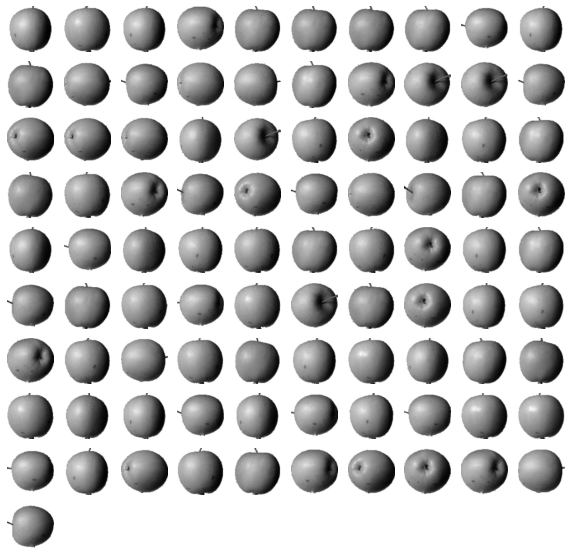

In [24]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n = len(arr) #n은 샘플의 개수
  #한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
  rows = int(np.ceil(n/10))
  #행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개 입니다.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)
  
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10 + j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

draw_fruits(fruits[km.labels_==0])

98


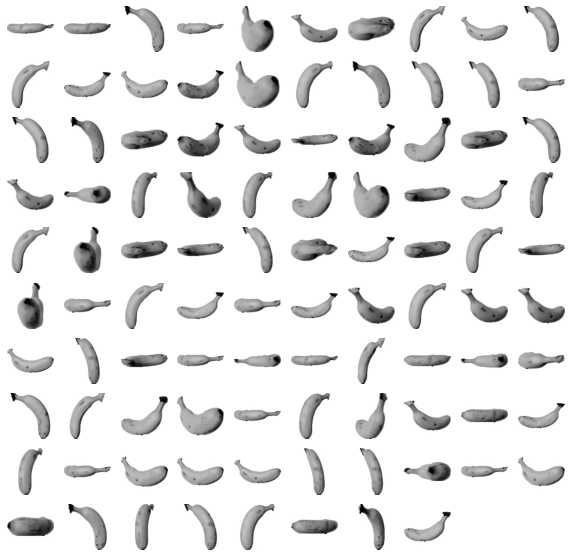

In [ ]:
draw_fruits(fruits[km.labels_==1])

111


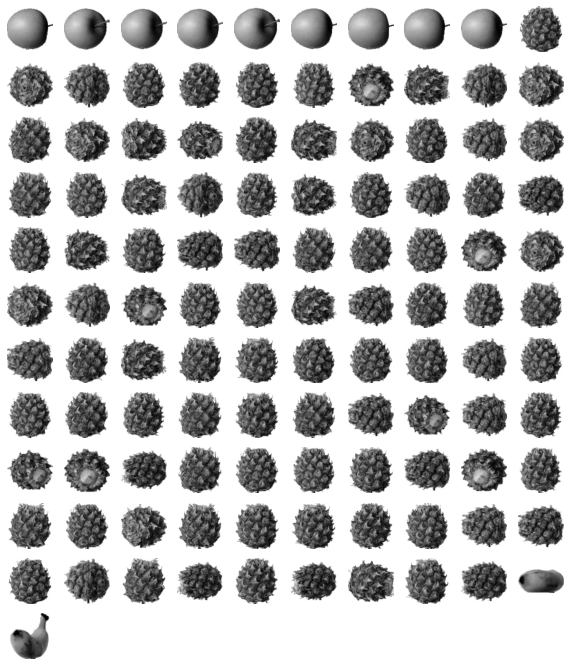

In [ ]:
draw_fruits(fruits[km.labels_==2])
#파인애플에 사과 9개와 바나나2개가 섞여있다!
#비록 섞여있지만 타깃 레이블이 전혀 제공되어 있지 않음에도 잘 구분해냈다

3


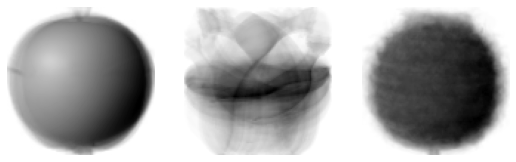

In [ ]:
#클러스터 중심
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)
#이 클러스터 중심은 fruits_2d 샘프르이 클러스터 중심이기 때문에 다시 2차원 배열로 만들어주어야한다.

#이전 절에서 절대값 오차를 사용한 평균값이란 매우 비슷하네요!!

[[5267.70439881 8837.37750892 3393.8136117 ]]
[1 1 1 ... 1 1 1]
[[1 1 1 ... 1 1 1]]
[2]
1


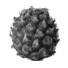

3


In [ ]:
#KMeans 클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 transform메서드를 가지고 있다.

print(km.transform(fruits_2d[100:101])) #보면 standartScalard와 비슷하다! 특성값을 뽑는것곽 같다.
print(fruits_2d[100]) #이렇게 하면 일차원
print(fruits_2d[100:101]) #이렇게 하면 슬라이싱으로 이차원
#transform 메서드도 2차원 배열을 기대하기에 fruits_2d[100]을 하게 되면 일차원 배열을 넘기니깐
#인덱스 슬라이싱을 써야된다.
#3번째 클러스터 중심과 제일 가깝네요!

print(km.predict(fruits_2d[100:101]))
#이 샘플은 레이블2에 속한것 같다

draw_fruits(fruits[100:101])
print(km.n_iter_)#반복횟수

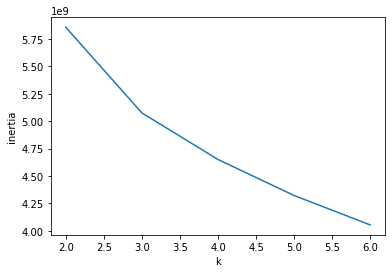

In [ ]:
#최적의 k찾기
#k-평균 알고리즘의 단점 중 하나는 클러스터 개수를 사전에 지정해야된다!! < 매우 귀찮
#이제 최적의 k를 찾아보자

#사실 군집 알고리즘에서 적절한 k 값을 찾기 위한 완벽한 방법은 없다!
#하지만 여기서는 적절한 클러스터 개수를 찾기 위한 대표적인 방법인 **엘보우**
#k-평균 알고리즘은 클러스터에 속한 샘플과 중심 사이의 거리를 잰다
#이 거리의 제곱 합을 **이너셔**라고 부른다.
#이너셔는 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값으로 생각할 수 있다.
#일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 클러스터 크기는 줄어들기 때문에 이너셔도 줄어든다.
#엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰!
#최적의 클러스터 개수를 찾는 방법


#클러스터 개수를 증가시키면서 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 있는데,
#이 지점부터는 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않는다.

inertia = []#이너셔 배열
for k in range(2,7):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()


#이 그래프에서는 꺾이는 지점이 k=3이다.

--2021-10-27 12:59:56--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-10-27 12:59:56--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-10-27 12:59:56--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

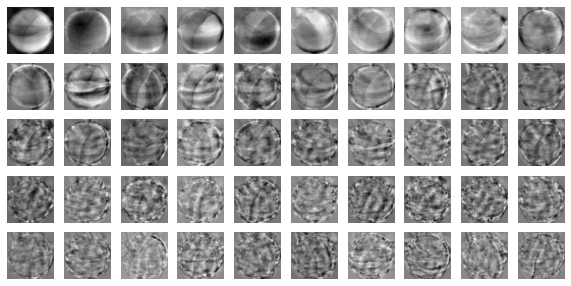

(300, 10000)
(300, 50)
(300, 10000)


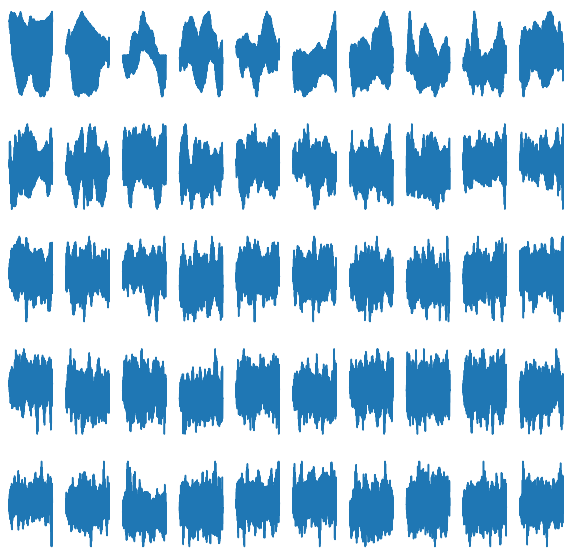

In [62]:
#06-3 주성분 분석

#차원과 차원 축소
#지금까지는 우리는 데이터가 가진 속성을 *특성*이라도 칭함
#과일 사진의 경우 10000개의 픽셀이 있고 10000개의 특성이 있는 것
#머신러닝에서는 이런 특성을 **차원**이라고도 부름
#10000개의 특성 = 10000개의 차원

#차원 축소 알고리즘

#주성분 분석 알고리즘 (PCA)를 배워보자
#주성분 분석(PCA)은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있다.
#주성분 벡터는 원본 데이터에 있는 어떤 방향
#따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.
#원본 데이터는 주성분을 사용해 차원을 줄일 수 있다.


!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)
#주성분 50개에 그림을 출력 10000은 100x100 픽셀의 사진을 말하는 것임
draw_fruits(pca.components_.reshape(-1,100,100))
#이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것
#한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것 처럼 생각할 수도 있다.

print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) #10000개의 특성을 50개에 특성에 투영시켜서 차원 축소를 하였다.
#데이터를 성공적으로 줄여서 공간 확보!

####원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fig,axs=plt.subplots(5,10,figsize=(10,10),squeeze=False)
for i in range(5):
  for j in range(10):
    axs[i,j].plot(np.arange(10000),pca.components_[i*10+j])
    axs[i,j].axis('off')

plt.show()


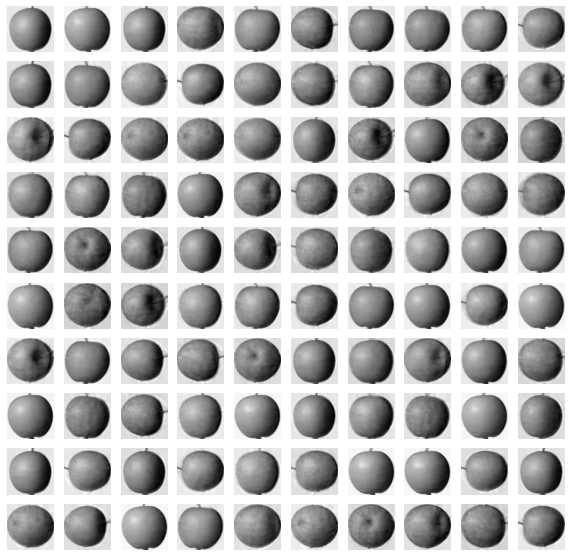

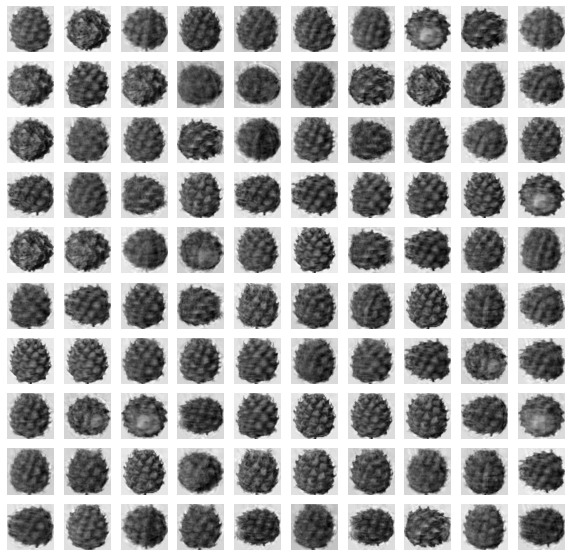

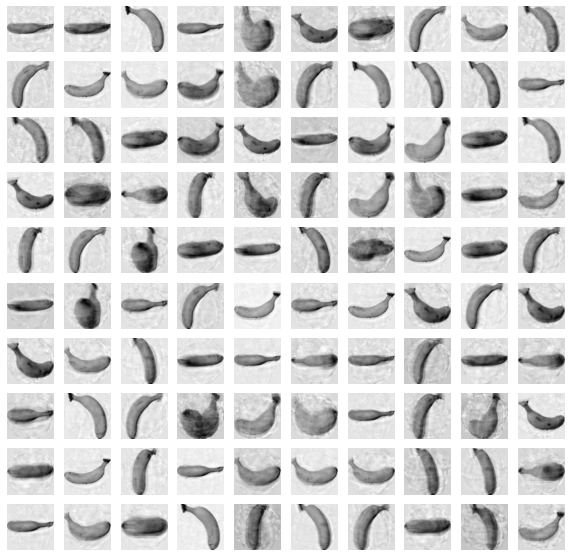

In [35]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

0.9215501373250576


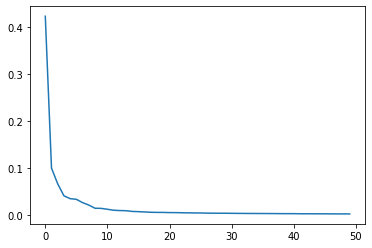

In [40]:
#####설명된 분산
#주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산**이라고 한다.
#PCA 클래스의 explained_variance_ratio_ 에 각 주성분의 설명된 분산 비율을 기록되어 있음
#이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.
print(np.sum(pca.explained_variance_ratio_))
#92%가 넘는 분산을 유지하고 있다!

plt.plot(pca.explained_variance_ratio_)
plt.show()

In [69]:
####다른 알고리즘과 함께 사용하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2] *100)

from sklearn.model_selection import cross_validate
#cross_validate 로 교차 검증
scores = cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
#fit_time 항목에 교차 검증 폴드의 훈련시간이 기록되어 있다.

scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) #엄청 많이 줄어들엇따!

0.9966666666666667
1.6274390697479248
0.9933333333333334
0.05166592597961426


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [70]:
pca = PCA(n_components=0.5)#설명된 분산의 50%에 달하는 주성분을 찾도록
pca.fit(fruits_2d)
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_)) ##설명된 분산의 합을 출력해도 50%의 비율로 찾은 것을 알 수 있다.

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) #300 주성분은 2개가 될 것이다. 픽셀이 300 크기인 것

scores = cross_validate(lr,fruits_pca,target)
print('주성분이 2개인 경우의 test_score',np.mean(scores['test_score']))
print('주성분이 2개인 경우의 fit_time',np.mean(scores['fit_time']))
#wow! 주성분 2로도 99%가 나왔네요!

2
0.52298772458006
(300, 2)
주성분이 2개인 경우의 test_score 0.9933333333333334
주성분이 2개인 경우의 fit_time 0.05096211433410645


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


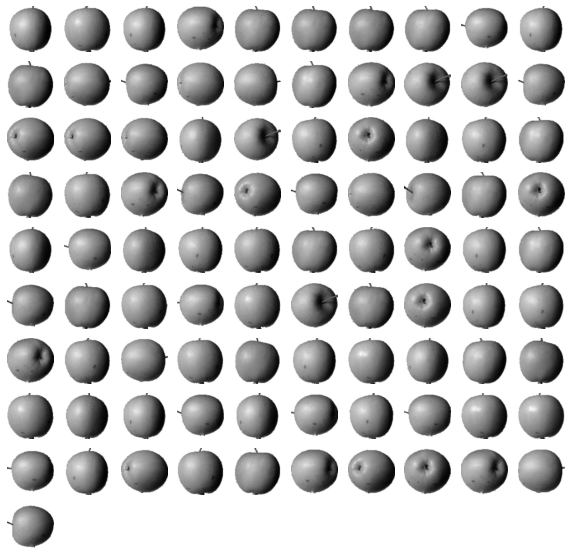

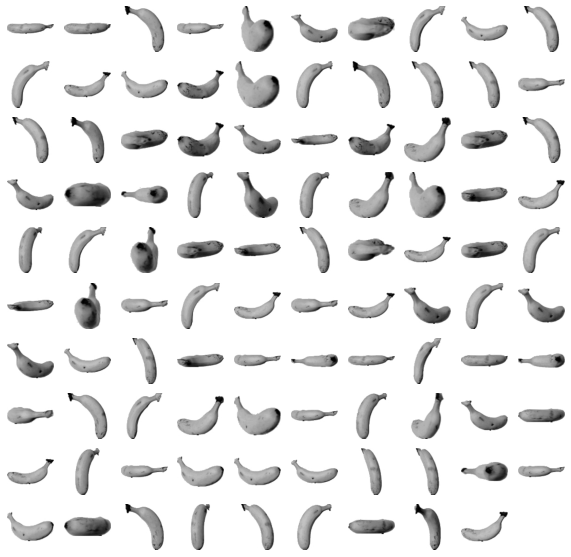

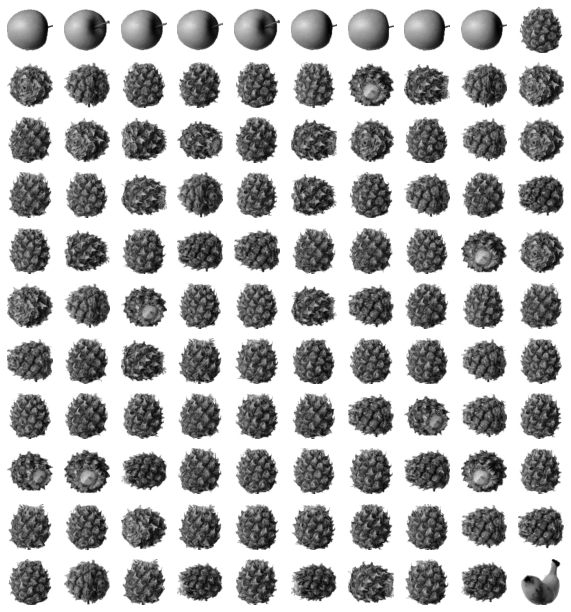

In [73]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))
#주성분으로 훈련시킨 것도 개수가 비슷하게 나누어 진것을 볼 수 있다.

for label in range(3):
  draw_fruits(fruits[km.labels_==label])
  print('\n')

#아직도 사과와 조금 혼돈 되지만 잘 뽑혔다

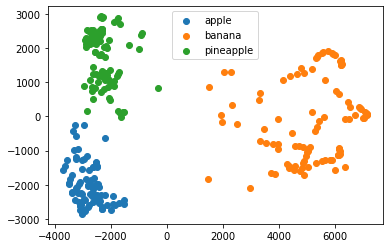

In [78]:
#주성분의 시각화 fruits_pca데이터는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있다.
for label in range(3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0],data[:,1])
  plt.legend(['apple','banana','pineapple'])
plt.show()